In [2]:
!pip install numpy
!pip install pandas

In [3]:
!pip install datetime
!pip install  matplotlib
!pip install matplotlib.pyplot
!pip install seaborn

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [4]:
!pip install sklearn

# 1. Importing Required Libraries

In [5]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
from matplotlib import rcParams

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
df=pd.read_csv('Data/Air_Quality_Monitoring_Newdataset.csv',parse_dates = ["Date"])
df

,City,Date,PM,ND,CM,SD,AQI,AQI_Bucket
0,Colombo,2015-01-01,NaN,18.22,0.92,27.64,NaN,NaN
1,Colombo,2015-01-02,NaN,15.69,0.97,24.55,NaN,NaN
2,Colombo,2015-01-03,NaN,19.30,17.40,29.07,NaN,NaN
3,Colombo,2015-01-04,NaN,18.48,1.70,18.59,NaN,NaN
4,Colombo,2015-01-05,NaN,21.42,22.10,39.33,NaN,NaN
...,...,...,...,...,...,...,...,...
29526,Colombo,2020-06-27,15.02,25.06,0.47,8.55,41.0,Good
29527,Colombo,2020-06-28,24.38,26.06,0.52,12.72,70.0,Satisfactory
29528,Colombo,2020-06-29,22.91,29.53,0.48,8.42,68.0,Satisfactory
29529,Colombo,2020-06-30,16.64,29.26,0.52,9.84,54.0,Satisfactory


# Features    
-->Date   
-->PM2.5 (Particulate Matter 2.5-micrometer)                       
-->SO2 (Sulphur Dioxide)            
-->NO2 (Nitric Dioxide)              
-->CO (Carbon Monoxide)           
-->AQI (Air Quality Index)          
-->AQI_Bucket 

In [8]:
df.head(10)

,City,Date,PM,ND,CM,SD,AQI,AQI_Bucket
0,Colombo,2015-01-01,NaN,18.22,0.92,27.64,NaN,NaN
1,Colombo,2015-01-02,NaN,15.69,0.97,24.55,NaN,NaN
2,Colombo,2015-01-03,NaN,19.30,17.40,29.07,NaN,NaN
3,Colombo,2015-01-04,NaN,18.48,1.70,18.59,NaN,NaN
4,Colombo,2015-01-05,NaN,21.42,22.10,39.33,NaN,NaN
5,Colombo,2015-01-06,NaN,38.48,45.41,45.76,NaN,NaN
6,Colombo,2015-01-07,NaN,40.62,112.16,32.28,NaN,NaN
7,Colombo,2015-01-08,NaN,36.74,80.87,38.54,NaN,NaN
8,Colombo,2015-01-09,NaN,31.00,29.16,58.68,NaN,NaN
9,Colombo,2015-01-10,NaN,7.04,NaN,8.29,NaN,NaN


In [9]:
print("df.shape : ", df.shape)

df.shape :  (29531, 8)


<mark>**29531 enteries with 8 features, 4 target value**</mark>

In [10]:
print(df.columns)

Index(['City', 'Date', 'PM', 'ND', 'CM', 'SD', 'AQI', 'AQI_Bucket'], dtype='object')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM          24933 non-null  float64       
 3   ND          25946 non-null  float64       
 4   CM          27472 non-null  float64       
 5   SD          25677 non-null  float64       
 6   AQI         24850 non-null  float64       
 7   AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 1.8+ MB


In [12]:
print(df.describe())

                 PM            ND            CM            SD           AQI
count  24933.000000  25946.000000  27472.000000  25677.000000  24850.000000
mean      67.450578     28.560659      2.248598     14.531977    166.463581
std       64.661449     24.474746      6.962884     18.133775    140.696585
min        0.040000      0.010000      0.000000      0.010000     13.000000
25%       28.820000     11.750000      0.510000      5.670000     81.000000
50%       48.570000     21.690000      0.890000      9.160000    118.000000
75%       80.590000     37.620000      1.450000     15.220000    208.000000
max      949.990000    362.210000    175.810000    193.860000   2049.000000


In [13]:
print(df.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
29526    False
29527    False
29528    False
29529    False
29530    False
Length: 29531, dtype: bool


In [14]:
sum(df.duplicated())

754

<AxesSubplot: >

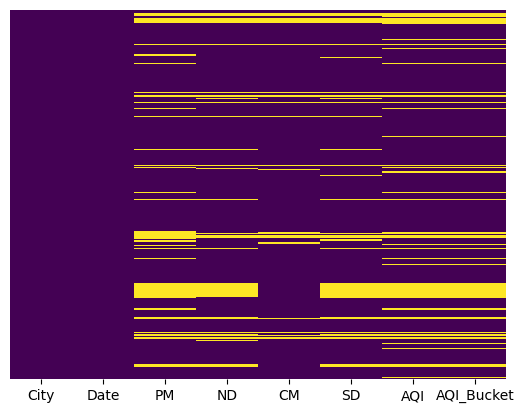

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
print(df.isnull().sum())

City             0
Date             0
PM            4598
ND            3585
CM            2059
SD            3854
AQI           4681
AQI_Bucket    4681
dtype: int64


In [17]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

AQI           15.851139
AQI_Bucket    15.851139
PM            15.570079
SD            13.050692
ND            12.139785
CM             6.972334
City           0.000000
Date           0.000000
dtype: float64

In [18]:
df.describe() # but it gives the information about all the cities alltogether

,PM,ND,CM,SD,AQI
count,24933.000000,25946.000000,27472.000000,25677.000000,24850.000000
mean,67.450578,28.560659,2.248598,14.531977,166.463581
std,64.661449,24.474746,6.962884,18.133775,140.696585
min,0.040000,0.010000,0.000000,0.010000,13.000000
25%,28.820000,11.750000,0.510000,5.670000,81.000000
50%,48.570000,21.690000,0.890000,9.160000,118.000000
75%,80.590000,37.620000,1.450000,15.220000,208.000000
max,949.990000,362.210000,175.810000,193.860000,2049.000000


In [19]:
df.columns

Index(['City', 'Date', 'PM', 'ND', 'CM', 'SD', 'AQI', 'AQI_Bucket'], dtype='object')

In [20]:
df[['PM','ND','CM','SD','AQI']] = df[['PM','ND','CM','SD','AQI']].astype('float')
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM          24933 non-null  float64       
 3   ND          25946 non-null  float64       
 4   CM          27472 non-null  float64       
 5   SD          25677 non-null  float64       
 6   AQI         24850 non-null  float64       
 7   AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 1.8+ MB


<AxesSubplot: >

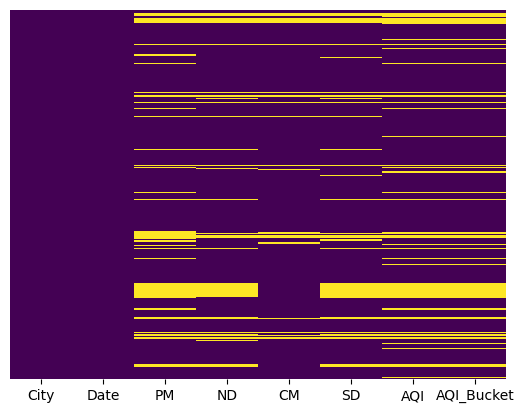

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
df.iloc[:, 1:7] = df.groupby("City").transform(lambda x: x.fillna(x.mean()))

In [23]:
df

,City,Date,PM,ND,CM,SD,AQI,AQI_Bucket
0,Colombo,2015-01-01,68.570011,18.22,0.92,27.64,169.762999,NaN
1,Colombo,2015-01-02,68.570011,15.69,0.97,24.55,169.762999,NaN
2,Colombo,2015-01-03,68.570011,19.30,17.40,29.07,169.762999,NaN
3,Colombo,2015-01-04,68.570011,18.48,1.70,18.59,169.762999,NaN
4,Colombo,2015-01-05,68.570011,21.42,22.10,39.33,169.762999,NaN
...,...,...,...,...,...,...,...,...
29526,Colombo,2020-06-27,15.020000,25.06,0.47,8.55,41.000000,Good
29527,Colombo,2020-06-28,24.380000,26.06,0.52,12.72,70.000000,Satisfactory
29528,Colombo,2020-06-29,22.910000,29.53,0.48,8.42,68.000000,Satisfactory
29529,Colombo,2020-06-30,16.640000,29.26,0.52,9.84,54.000000,Satisfactory


<AxesSubplot: >

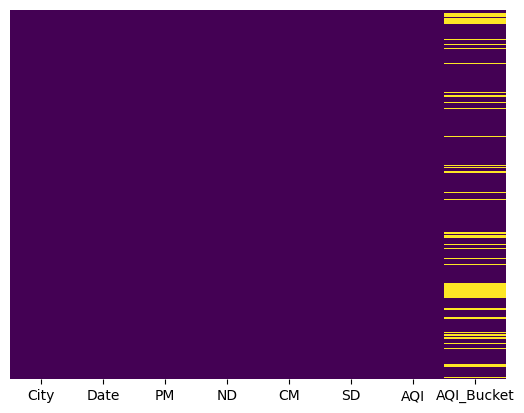

In [24]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### 3. Calculating Sub-Index


-->Calculation seperately using the pollutants

-->For PM2.5, SO2, NOx the average value in last 24-hrs is used with the condition of having at least 16 values.

-->For CO is the maximum value in last 8-hrs is used.

-->Final AQI is the maximum Sub-Index with the condition  and at least three out of the five should be available.


In [25]:
# PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x > 30 and x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x > 60 and x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x > 90 and x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x > 120 and x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM_SubIndex"] = df["PM"].astype(int).apply(lambda x: get_PM25_subindex(x))


# SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x > 380 and x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x > 800 and x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SD_SubIndex"] = df["SD"].astype(int).apply(lambda x: get_SO2_subindex(x))


# NO2 Sub-Index calculation
def get_NO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["ND_SubIndex"] = df["ND"].astype(int).apply(lambda x: get_NO2_subindex(x))


# CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0
df["CM_SubIndex"] = df["CM"].astype(int).apply(lambda x: get_CO_subindex(x))


### 4. Filling the Nan values of AQI column by taking maximum values out of sub-Indexes

In [26]:
df["AQI"] = df["AQI"].fillna(round(df[["PM_SubIndex", "ND_SubIndex", "CM_SubIndex", "SD_SubIndex"]].max(axis = 1)))

In [27]:
df

,City,Date,PM,ND,CM,SD,AQI,AQI_Bucket,PM_SubIndex,SD_SubIndex,ND_SubIndex,CM_SubIndex
0,Colombo,2015-01-01,68.570011,18.22,0.92,27.64,169.762999,NaN,126.666667,33.75,22.50,0.000000
1,Colombo,2015-01-02,68.570011,15.69,0.97,24.55,169.762999,NaN,126.666667,30.00,18.75,0.000000
2,Colombo,2015-01-03,68.570011,19.30,17.40,29.07,169.762999,NaN,126.666667,36.25,23.75,300.000000
3,Colombo,2015-01-04,68.570011,18.48,1.70,18.59,169.762999,NaN,126.666667,22.50,22.50,50.000000
4,Colombo,2015-01-05,68.570011,21.42,22.10,39.33,169.762999,NaN,126.666667,48.75,26.25,329.411765
...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Colombo,2020-06-27,15.020000,25.06,0.47,8.55,41.000000,Good,25.000000,10.00,31.25,0.000000
29527,Colombo,2020-06-28,24.380000,26.06,0.52,12.72,70.000000,Satisfactory,40.000000,15.00,32.50,0.000000
29528,Colombo,2020-06-29,22.910000,29.53,0.48,8.42,68.000000,Satisfactory,36.666667,10.00,36.25,0.000000
29529,Colombo,2020-06-30,16.640000,29.26,0.52,9.84,54.000000,Satisfactory,26.666667,11.25,36.25,0.000000


<AxesSubplot: >

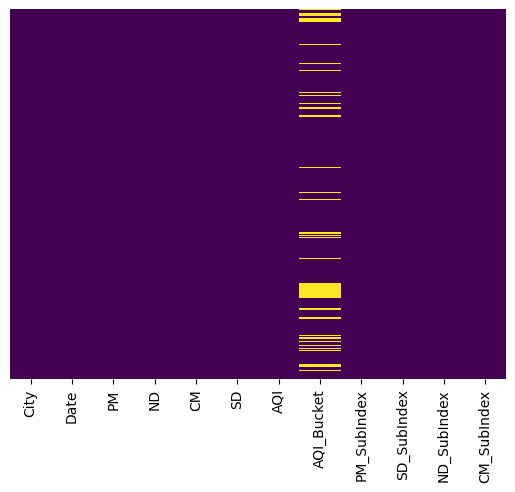

In [28]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# AQI bucket

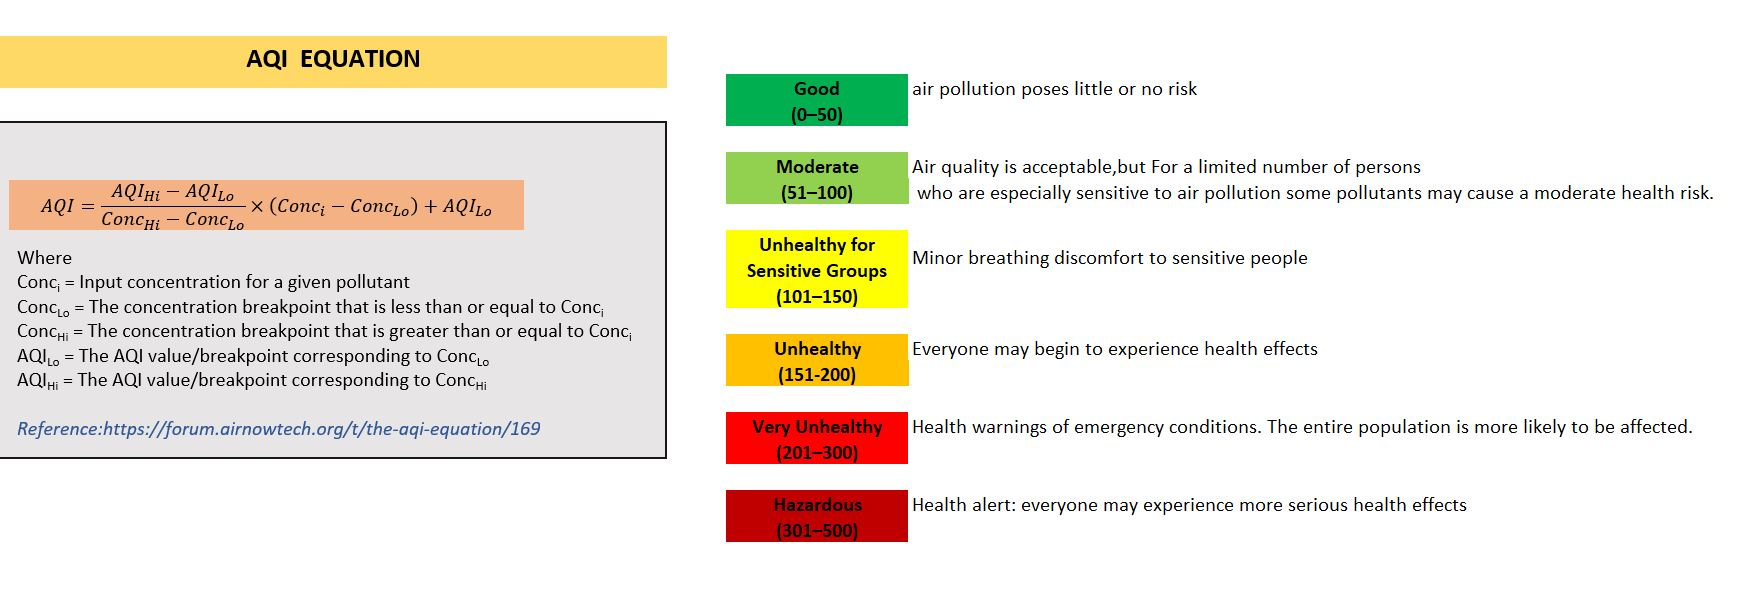

In [29]:
from IPython import display 
display.Image("AQI_Bucket.jpg",width = 1000, height = 800)

### calculating AQI bucket and filling the NAN value present

In [30]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'
    
df["AQI_Bucket"] = df["AQI_Bucket"].fillna(df["AQI"].apply(lambda x: get_AQI_bucket(x)))


In [31]:
df

,City,Date,PM,ND,CM,SD,AQI,AQI_Bucket,PM_SubIndex,SD_SubIndex,ND_SubIndex,CM_SubIndex
0,Colombo,2015-01-01,68.570011,18.22,0.92,27.64,169.762999,Moderate,126.666667,33.75,22.50,0.000000
1,Colombo,2015-01-02,68.570011,15.69,0.97,24.55,169.762999,Moderate,126.666667,30.00,18.75,0.000000
2,Colombo,2015-01-03,68.570011,19.30,17.40,29.07,169.762999,Moderate,126.666667,36.25,23.75,300.000000
3,Colombo,2015-01-04,68.570011,18.48,1.70,18.59,169.762999,Moderate,126.666667,22.50,22.50,50.000000
4,Colombo,2015-01-05,68.570011,21.42,22.10,39.33,169.762999,Moderate,126.666667,48.75,26.25,329.411765
...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Colombo,2020-06-27,15.020000,25.06,0.47,8.55,41.000000,Good,25.000000,10.00,31.25,0.000000
29527,Colombo,2020-06-28,24.380000,26.06,0.52,12.72,70.000000,Satisfactory,40.000000,15.00,32.50,0.000000
29528,Colombo,2020-06-29,22.910000,29.53,0.48,8.42,68.000000,Satisfactory,36.666667,10.00,36.25,0.000000
29529,Colombo,2020-06-30,16.640000,29.26,0.52,9.84,54.000000,Satisfactory,26.666667,11.25,36.25,0.000000


<AxesSubplot: >

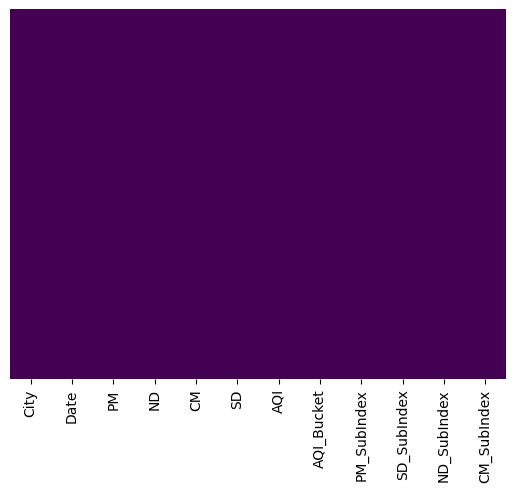

In [32]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [33]:
df.columns

Index(['City', 'Date', 'PM', 'ND', 'CM', 'SD', 'AQI', 'AQI_Bucket',
       'PM_SubIndex', 'SD_SubIndex', 'ND_SubIndex', 'CM_SubIndex'],
      dtype='object')

In [34]:
df_city_day = df.copy()
df_city_day.columns

Index(['City', 'Date', 'PM', 'ND', 'CM', 'SD', 'AQI', 'AQI_Bucket',
       'PM_SubIndex', 'SD_SubIndex', 'ND_SubIndex', 'CM_SubIndex'],
      dtype='object')

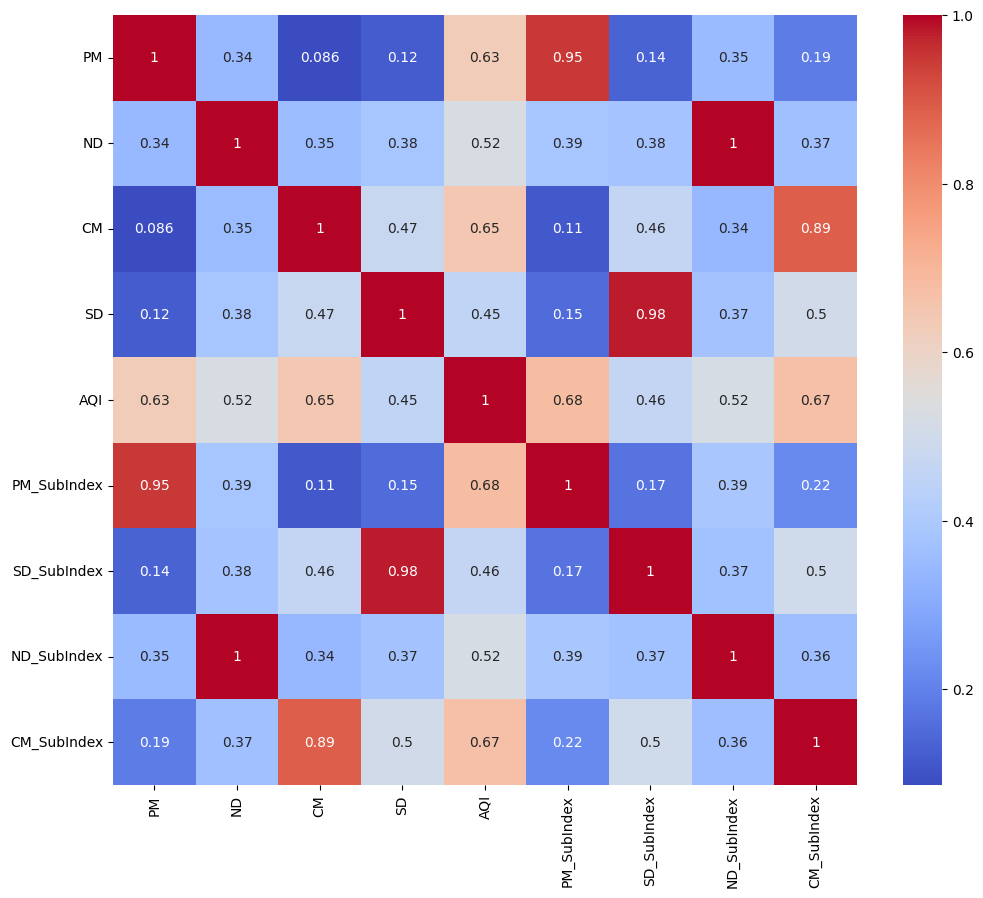

In [35]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True);

## Prediction

### Prepairing Data for Model Preparation

In [40]:
from sklearn.model_selection import train_test_split

X = df[['PM','ND','CM','SD']]
y = df['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [41]:
print('Length of X_train', len(X_train))
print('Length of X_test', len(X_test))
print('Length of y_train', len(y_train))
print('Length of y_test', len(y_test))

Length of X_train 23624
Length of X_test 5907
Length of y_train 23624
Length of y_test 5907


## Applying Machine Learning Algos :

### Random Forest

In [42]:
def model_acc(model):
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(str(model)+ ' --> ' +str(acc))

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_acc(rf)

RandomForestRegressor() --> 0.8668026640788244


In [44]:
round(rf.score(X_train, y_train)*100,2)

97.78

In [45]:
round(rf.score(X_test, y_test)*100,2)

86.68

In [46]:
round(rf.score(X, y)*100,2)

95.77

In [47]:
#Cross Validation

from sklearn.model_selection import cross_val_score
score=cross_val_score(rf,X_train,y_train,cv=5)
round(score.mean()*100,2)

84.49

In [48]:
# Model Evaluation
from sklearn import metrics
prediction=rf.predict(X_test)


print('Random Forest Regression')
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


Random Forest Regression
MAE: 24.993843211313145
MSE: 2009.3463727373776
RMSE: 44.82573337645886


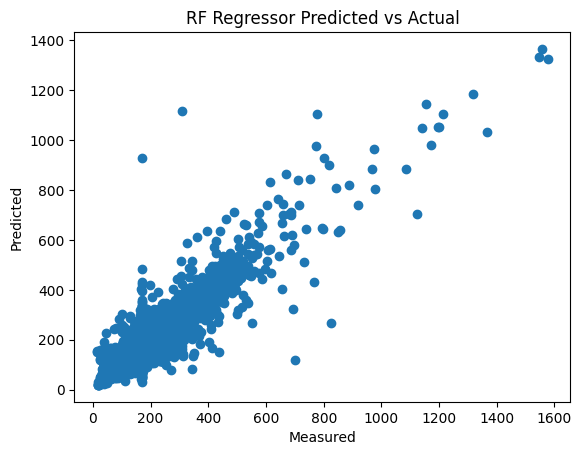

In [49]:
#rf
plt.scatter(y_test, prediction)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('RF Regressor Predicted vs Actual')
plt.show()



In [50]:
prediction

array([169.58005254, 169.58005254, 141.89762999, ..., 146.99577993,
        79.89403621, 124.74525998])

In [ ]:
#from sklearn.model_selection import GridSearchCV

#parameters = {'n_estimators':[10, 50, 100],
              'criterion':['squared_error','absolute_error','poisson']}

#grid_obj = GridSearchCV(estimator=rf, param_grid=parameters)

#grid_fit = grid_obj.fit(X_train, y_train)

#best_model = grid_fit.best_estimator_

#best_model.score(X_test, y_test)

In [51]:
X_test.columns

Index(['PM', 'ND', 'CM', 'SD'], dtype='object')

### Save model 

In [53]:
import pickle
with open('predictor.pickle', 'wb') as file:
    pickle.dump(rf, file)

In [55]:
pred_value =rf.predict([[50.25,15.13,1.5,12]])
pred_value

array([129.08051996])